In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../gefera')
import gefera as gf

In [2]:
ap = 1.0
tp = 0.2
ep = 0.2
pp = 365
wp = 0.1 * np.pi / 180
ip = 90.0 * np.pi / 180

am = 0.007
tm = -2.15
em = 0.1
pm = 3
om = 90 * np.pi / 180
wm = 90 * np.pi / 180
im = 90.0 * np.pi / 180
mm = 0.01

u1 = 0.5
u2 = 0.3
rp = 0.2
rm = 0.1

In [62]:
# figure out the lan/lop confusion 
po = gf.PrimaryOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.SatelliteOrbit(am, tm, em, pm, om, wm, im, mm)
sys = gf.HierarchicalSystem(po, mo)

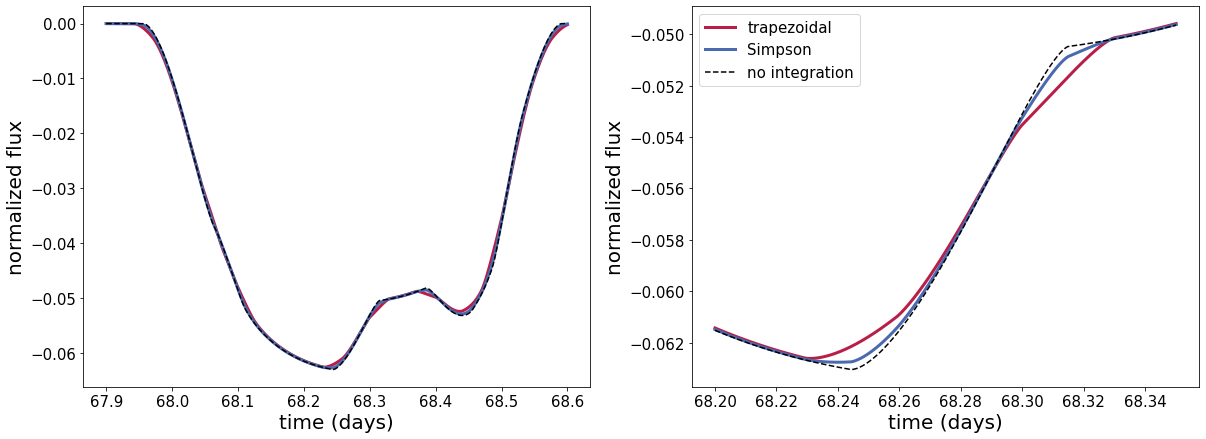

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

t = np.linspace(67.9, 68.6, 10000)
dt = 0.03

lc_ng = sys.lightcurve(t, u1, u2, rp, rm)
lc_ng_simp = sys.lightcurve(t, u1, u2, rp, rm, integrate='simpson', dt=dt)
lc_ng_trap = sys.lightcurve(t, u1, u2, rp, rm, integrate='trapezoid', dt=dt)

axs[0].plot(t, lc_ng_trap, color=plt.cm.Spectral(0.05), linewidth=3, label='trapezoidal')
axs[0].plot(t, lc_ng_simp, color=plt.cm.Spectral(0.95), linewidth=3, label='Simpson')
axs[0].plot(t, lc_ng, color='k', linestyle='--', label='no integration')

axs[0].set_xlabel('time (days)', fontsize=20)
axs[0].set_ylabel('normalized flux', fontsize=20)
#axs[0].legend(fontsize=15)
axs[0].tick_params(axis='both', which='major', labelsize=15)

t = np.linspace(68.2, 68.35, 10000)
dt = 0.03

lc_ng = sys.lightcurve(t, u1, u2, rp, rm)
lc_ng_simp = sys.lightcurve(t, u1, u2, rp, rm, integrate='simpson', dt=dt)
lc_ng_trap = sys.lightcurve(t, u1, u2, rp, rm, integrate='trapezoid', dt=dt)

axs[1].plot(t, lc_ng_trap, color=plt.cm.Spectral(0.05), linewidth=3, label='trapezoidal')
axs[1].plot(t, lc_ng_simp, color=plt.cm.Spectral(0.95), linewidth=3, label='Simpson')
axs[1].plot(t, lc_ng, color='k', linestyle='--', label='no integration')

axs[1].set_xlabel('time (days)', fontsize=20)
axs[1].set_ylabel('normalized flux', fontsize=20)
axs[1].legend(fontsize=15)
axs[1].tick_params(axis='both', which='major', labelsize=15)

plt.savefig('/Users/tgordon/Desktop/exp_time_int.pdf')